In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import f1_score
from sklearn.preprocessing import Imputer

### 파일 불러오기 

In [2]:
train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Columns: 180 entries, dt_of_fr to cltrl_hrtg_yn
dtypes: float64(147), int64(12), object(21)
memory usage: 81.3+ MB


In [4]:
train.isnull().sum()

dt_of_fr                        0
fr_yn                           0
bldng_us                    27677
bldng_archtctr              27665
bldng_cnt                       0
                            ...  
us_yn                       49447
dngrs_thng_yn               49447
slf_fr_brgd_yn              49447
blk_dngrs_thng_mnfctr_yn    49447
cltrl_hrtg_yn               49447
Length: 180, dtype: int64

### 문자 변수 매핑 및 FE

In [5]:
tmp = pd.to_datetime(train['dt_of_fr'])
train['release_year'] = tmp.dt.year.astype(str)
train['release_month'] = tmp.dt.month.astype(str)
train['release_weekday'] = tmp.dt.weekday
train['is_release_weekend'] = (train['release_weekday'] > 4).astype(np.uint8)
train['release_weekday'] = train['release_weekday'].astype(str)
train['release_time'] = (tmp.max()-tmp).dt.days

val['release_year'] = tmp.dt.year.astype(str)
val['release_month'] = tmp.dt.month.astype(str)
val['release_weekday'] = tmp.dt.weekday
val['is_release_weekend'] = (val['release_weekday'] > 4).astype(np.uint8)
val['release_weekday'] = val['release_weekday'].astype(str)
val['release_time'] = (tmp.max()-tmp).dt.days

test['release_year'] = tmp.dt.year.astype(str)
test['release_month'] = tmp.dt.month.astype(str)
test['release_weekday'] = tmp.dt.weekday
test['is_release_weekend'] = (test['release_weekday'] > 4).astype(np.uint8)
test['release_weekday'] = test['release_weekday'].astype(str)
test['release_time'] = (tmp.max()-tmp).dt.days

In [6]:
binary_y = {'N': 0, 'Y': 1}

train['fr_yn'] = train['fr_yn'].map(binary_y)
val['fr_yn'] = val['fr_yn'].map(binary_y)

In [7]:
train['bldng_us']=train['bldng_us'].map({'단독주택':1,'제1종근린생활시설':2,'제2종근린생활시설':3,'창고시설':4,'동.식물 관련시설':5,
                                        '공장':6,'공동주택':7,'숙박시설':8,'노유자시설':9,'교육연구시설':10,'종교시설':11,
                                        '업무시설':12,'자동차관련시설':13,'위험물저장및처리시설':14,'분뇨.쓰레기처리시설':15,'판매시설':16,
                                        '운동시설':17,'문화및집회시설':18,'위락시설':19,'근린생활시설':20,'관광휴게시설':21,'의료시설':22,
                                        '교육연구및복지시설':23,'수련시설':24,'운수시설':25,'발전시설':26,'방송통신시설':27,'묘지관련시설':28,
                                        '교정및군사시설':29,'장례식장':30,'파출소':31,'시장':32,'판매및영업시설':33,'공공용시설':34})
val['bldng_us']=val['bldng_us'].map({'단독주택':1,'제1종근린생활시설':2,'제2종근린생활시설':3,'창고시설':4,'동.식물 관련시설':5,
                                        '공장':6,'공동주택':7,'숙박시설':8,'노유자시설':9,'교육연구시설':10,'종교시설':11,
                                        '업무시설':12,'자동차관련시설':13,'위험물저장및처리시설':14,'분뇨.쓰레기처리시설':15,'판매시설':16,
                                        '운동시설':17,'문화및집회시설':18,'위락시설':19,'근린생활시설':20,'관광휴게시설':21,'의료시설':22,
                                        '교육연구및복지시설':23,'수련시설':24,'운수시설':25,'발전시설':26,'방송통신시설':27,'묘지관련시설':28,
                                        '교정및군사시설':29,'장례식장':30,'파출소':31,'시장':32,'판매및영업시설':33,'공공용시설':34})
test['bldng_us']=test['bldng_us'].map({'단독주택':1,'제1종근린생활시설':2,'제2종근린생활시설':3,'창고시설':4,'동.식물 관련시설':5,
                                        '공장':6,'공동주택':7,'숙박시설':8,'노유자시설':9,'교육연구시설':10,'종교시설':11,
                                        '업무시설':12,'자동차관련시설':13,'위험물저장및처리시설':14,'분뇨.쓰레기처리시설':15,'판매시설':16,
                                        '운동시설':17,'문화및집회시설':18,'위락시설':19,'근린생활시설':20,'관광휴게시설':21,'의료시설':22,
                                        '교육연구및복지시설':23,'수련시설':24,'운수시설':25,'발전시설':26,'방송통신시설':27,'묘지관련시설':28,
                                        '교정및군사시설':29,'장례식장':30,'파출소':31,'시장':32,'판매및영업시설':33,'공공용시설':34})

In [8]:
train['bldng_archtctr']=train['bldng_archtctr'].map({'벽돌구조':1,'일반목구조':2,'철근콘크리트구조':3,'블록구조':4,
                                                    '경량철골구조':5,'일반철골구조':6,'조적구조':7,'강파이프구조':8,
                                                    '기타조적구조':9,'석구조':10,'철골철근콘크리트구조':11,'기타강구조':12,
                                                    '철골콘크리트구조':13,'기타구조':14,'목구조':15,'프리케스트콘크리트구조':16,
                                                    '통나무구조':17,'기타콘크리트구조':18})
val['bldng_archtctr']=val['bldng_archtctr'].map({'벽돌구조':1,'일반목구조':2,'철근콘크리트구조':3,'블록구조':4,
                                                    '경량철골구조':5,'일반철골구조':6,'조적구조':7,'강파이프구조':8,
                                                    '기타조적구조':9,'석구조':10,'철골철근콘크리트구조':11,'기타강구조':12,
                                                    '철골콘크리트구조':13,'기타구조':14,'목구조':15,'프리케스트콘크리트구조':16,
                                                    '통나무구조':17,'기타콘크리트구조':18})
test['bldng_archtctr']=test['bldng_archtctr'].map({'벽돌구조':1,'일반목구조':2,'철근콘크리트구조':3,'블록구조':4,
                                                    '경량철골구조':5,'일반철골구조':6,'조적구조':7,'강파이프구조':8,
                                                    '기타조적구조':9,'석구조':10,'철골철근콘크리트구조':11,'기타강구조':12,
                                                    '철골콘크리트구조':13,'기타구조':14,'목구조':15,'프리케스트콘크리트구조':16,
                                                    '통나무구조':17,'기타콘크리트구조':18})

In [9]:
train['bldng_us_clssfctn']=train['bldng_us_clssfctn'].map({'주거용':1,'상업용':2,'기타':3,'농수산용':4,
                                                          '공업용':5,'문교사회용':6,'공공용':34})
val['bldng_us_clssfctn']=val['bldng_us_clssfctn'].map({'주거용':1,'상업용':2,'기타':3,'농수산용':4,
                                                          '공업용':5,'문교사회용':6,'공공용':34})
test['bldng_us_clssfctn']=test['bldng_us_clssfctn'].map({'주거용':1,'상업용':2,'기타':3,'농수산용':4,
                                                          '공업용':5,'문교사회용':6,'공공용':34})

In [10]:
train['jmk'] = train['jmk'].map({'대':1,'전':2,'답':3,'장':4,'잡':5,'창':6,'임':7,'목':8,
                                '도':9,'종':10,'학':11,'구':12,'과':13,'천':14,'주':15,'양':16,
                                '차':17,'체':18,'묘':19,'원':20,'철':21,'유':22,'공':23,'제':24,
                                '수':25,'사':26})
val['jmk'] = val['jmk'].map({'대':1,'전':2,'답':3,'장':4,'잡':5,'창':6,'임':7,'목':8,
                                '도':9,'종':10,'학':11,'구':12,'과':13,'천':14,'주':15,'양':16,
                                '차':17,'체':18,'묘':19,'원':20,'철':21,'유':22,'공':23,'제':24,
                                '수':25,'사':26})
test['jmk'] = test['jmk'].map({'대':1,'전':2,'답':3,'장':4,'잡':5,'창':6,'임':7,'목':8,
                                '도':9,'종':10,'학':11,'구':12,'과':13,'천':14,'주':15,'양':16,
                                '차':17,'체':18,'묘':19,'원':20,'철':21,'유':22,'공':23,'제':24,
                                '수':25,'사':26})

In [11]:
train['rgnl_ar_nm'] = train['rgnl_ar_nm'].map({'계획관리지역':1,'제2종일반주거지역':2,'제1종일반주거지역':3,'자연녹지지역':4,'일반상업지역':5,
                                              '생산관리지역':6,'농림지역':7,'보전관리지역':8,'일반공업지역':9,'제3종일반주거지역':10,'제1종전용주거지역':11,
                                              '자연환경보전지역':12,'준주거지역':13,'생산녹지지역':14,'준공업지역':15,'개발제한구역':16,'보전녹지지역':17,
                                              '제2종전용주거지역':18,'근린상업지역 ':19,'유통상업지역':20,'중심상업지역':21,'관리지역':22,'용도미지정':23})
val['rgnl_ar_nm'] = val['rgnl_ar_nm'].map({'계획관리지역':1,'제2종일반주거지역':2,'제1종일반주거지역':3,'자연녹지지역':4,'일반상업지역':5,
                                              '생산관리지역':6,'농림지역':7,'보전관리지역':8,'일반공업지역':9,'제3종일반주거지역':10,'제1종전용주거지역':11,
                                              '자연환경보전지역':12,'준주거지역':13,'생산녹지지역':14,'준공업지역':15,'개발제한구역':16,'보전녹지지역':17,
                                              '제2종전용주거지역':18,'근린상업지역 ':19,'유통상업지역':20,'중심상업지역':21,'관리지역':22,'용도미지정':23})
test['rgnl_ar_nm'] = test['rgnl_ar_nm'].map({'계획관리지역':1,'제2종일반주거지역':2,'제1종일반주거지역':3,'자연녹지지역':4,'일반상업지역':5,
                                              '생산관리지역':6,'농림지역':7,'보전관리지역':8,'일반공업지역':9,'제3종일반주거지역':10,'제1종전용주거지역':11,
                                              '자연환경보전지역':12,'준주거지역':13,'생산녹지지역':14,'준공업지역':15,'개발제한구역':16,'보전녹지지역':17,
                                              '제2종전용주거지역':18,'근린상업지역 ':19,'유통상업지역':20,'중심상업지역':21,'관리지역':22,'용도미지정':23})

In [12]:
train['rgnl_ar_nm2'] = train['rgnl_ar_nm2'].map({'지정되지않음':1,'자연녹지지역':2,'제2종일반주거지역':3,'계획관리지역':4,
                                                '보전관리지역':5,'제1종일반주거지역':6,'농림지역':7,'일반상업지역':8,'자연환경보전지역':9,
                                                '보전녹지지역':10,'생산관리지역':11,'준주거지역':12,'제3종일반주거지역':13,'생산녹지지역':14,
                                                '준공업지역':15,'일반공업지역':16,'개발제한구역':17,'근린상업지역':18,'관리지역':19})
val['rgnl_ar_nm2'] = val['rgnl_ar_nm2'].map({'지정되지않음':1,'자연녹지지역':2,'제2종일반주거지역':3,'계획관리지역':4,
                                                '보전관리지역':5,'제1종일반주거지역':6,'농림지역':7,'일반상업지역':8,'자연환경보전지역':9,
                                                '보전녹지지역':10,'생산관리지역':11,'준주거지역':12,'제3종일반주거지역':13,'생산녹지지역':14,
                                                '준공업지역':15,'일반공업지역':16,'개발제한구역':17,'근린상업지역':18,'관리지역':19})
test['rgnl_ar_nm2'] = test['rgnl_ar_nm2'].map({'지정되지않음':1,'자연녹지지역':2,'제2종일반주거지역':3,'계획관리지역':4,
                                                '보전관리지역':5,'제1종일반주거지역':6,'농림지역':7,'일반상업지역':8,'자연환경보전지역':9,
                                                '보전녹지지역':10,'생산관리지역':11,'준주거지역':12,'제3종일반주거지역':13,'생산녹지지역':14,
                                                '준공업지역':15,'일반공업지역':16,'개발제한구역':17,'근린상업지역':18,'관리지역':19})

In [13]:
train['lnd_us_sttn_nm'] = train['lnd_us_sttn_nm'].map({'단독':1,'주거기타':2,'상업용':3,'주상용':4,'공업용':5,'전':6,'답':7,
                                                      '주거나지':8,'답기타':9,'전기타':10,'아파트':11,'자연림':12,'주상기타':13,
                                                      '도로등':14,'과수원':15,'상업기타':16,'업무용':17,'다세대':18,'주상나지':19,
                                                      '공업기타':20,'연립':21,'상업나지':22,'하천등':23,'토지임야':24,'공업나지':25,
                                                      '임야기타':26,'조림':27,'주차장등':28,'공원등':29,'기타':30,'운동장등':31,'유해.혐오시설':32,
                                                      '목장용지':33,'고속도로휴게소':34,'여객자동차터미널':35,'골프장 회원제':36,'위험시설':37,
                                                      '유원지':38,'특수기타':39,'공원묘지':40,'발전소':41,'골프장 대중제':42,'스키장':43,'콘도미니엄':44})
val['lnd_us_sttn_nm'] = val['lnd_us_sttn_nm'].map({'단독':1,'주거기타':2,'상업용':3,'주상용':4,'공업용':5,'전':6,'답':7,
                                                      '주거나지':8,'답기타':9,'전기타':10,'아파트':11,'자연림':12,'주상기타':13,
                                                      '도로등':14,'과수원':15,'상업기타':16,'업무용':17,'다세대':18,'주상나지':19,
                                                      '공업기타':20,'연립':21,'상업나지':22,'하천등':23,'토지임야':24,'공업나지':25,
                                                      '임야기타':26,'조림':27,'주차장등':28,'공원등':29,'기타':30,'운동장등':31,'유해.혐오시설':32,
                                                      '목장용지':33,'고속도로휴게소':34,'여객자동차터미널':35,'골프장 회원제':36,'위험시설':37,
                                                      '유원지':38,'특수기타':39,'공원묘지':40,'발전소':41,'골프장 대중제':42,'스키장':43,'콘도미니엄':44})
test['lnd_us_sttn_nm'] = test['lnd_us_sttn_nm'].map({'단독':1,'주거기타':2,'상업용':3,'주상용':4,'공업용':5,'전':6,'답':7,
                                                      '주거나지':8,'답기타':9,'전기타':10,'아파트':11,'자연림':12,'주상기타':13,
                                                      '도로등':14,'과수원':15,'상업기타':16,'업무용':17,'다세대':18,'주상나지':19,
                                                      '공업기타':20,'연립':21,'상업나지':22,'하천등':23,'토지임야':24,'공업나지':25,
                                                      '임야기타':26,'조림':27,'주차장등':28,'공원등':29,'기타':30,'운동장등':31,'유해.혐오시설':32,
                                                      '목장용지':33,'고속도로휴게소':34,'여객자동차터미널':35,'골프장 회원제':36,'위험시설':37,
                                                      '유원지':38,'특수기타':39,'공원묘지':40,'발전소':41,'골프장 대중제':42,'스키장':43,'콘도미니엄':44})

In [14]:
train['rd_sd_nm'] = train['rd_sd_nm'].map({'세로한면(가)':1,'세로한면(불)':2,'소로한면':3,'맹지':4,'소로각지':5,'중로한면':6,
                                          '세로각지(가)':7,'중로각지':8,'세로각지(불)':9,'광대로한면':10,'광대소각':11,'광대세각':12,'지정되지않음 ':13})
val['rd_sd_nm'] = val['rd_sd_nm'].map({'세로한면(가)':1,'세로한면(불)':2,'소로한면':3,'맹지':4,'소로각지':5,'중로한면':6,
                                          '세로각지(가)':7,'중로각지':8,'세로각지(불)':9,'광대로한면':10,'광대소각':11,'광대세각':12,'지정되지않음 ':13})
test['rd_sd_nm'] = test['rd_sd_nm'].map({'세로한면(가)':1,'세로한면(불)':2,'소로한면':3,'맹지':4,'소로각지':5,'중로한면':6,
                                          '세로각지(가)':7,'중로각지':8,'세로각지(불)':9,'광대로한면':10,'광대소각':11,'광대세각':12,'지정되지않음 ':13})

In [15]:
#여기부터
train['mlt_us_yn'] = train['mlt_us_yn'].map({'N':0,'Y':1})
val['mlt_us_yn'] = val['mlt_us_yn'].map({'N':0,'Y':1})
test['mlt_us_yn'] = test['mlt_us_yn'].map({'N':0,'Y':1})

In [16]:
train['trgt_crtr'] = train['trgt_crtr'].map({'일반대상물':1,'민박7실이하':2,'자동화재탐지설치대상':3,'옥내소화전설치대상':4,
                                            '스프링클러,물분무등설치대상':5,'민박7실이상':6,'펜션7실이하':7,'면적 15,000 이상':8,
                                            '공동주택(주택법시행령제63조제1항각호1에해당)':9,'11층이상':10,'펜션7실이상':11,'기타(가설건축물분류)':12,
                                             '콘테이너하우스 ':13,'기타':14,'임시사무실,창고,숙소':15,'견본주택(모델하우스)':16,'주거용비닐하우스':17})
val['trgt_crtr'] = val['trgt_crtr'].map({'일반대상물':1,'민박7실이하':2,'자동화재탐지설치대상':3,'옥내소화전설치대상':4,
                                            '스프링클러,물분무등설치대상':5,'민박7실이상':6,'펜션7실이하':7,'면적 15,000 이상':8,
                                            '공동주택(주택법시행령제63조제1항각호1에해당)':9,'11층이상':10,'펜션7실이상':11,'기타(가설건축물분류)':12,
                                             '콘테이너하우스 ':13,'기타':14,'임시사무실,창고,숙소':15,'견본주택(모델하우스)':16,'주거용비닐하우스':17})
test['trgt_crtr'] = test['trgt_crtr'].map({'일반대상물':1,'민박7실이하':2,'자동화재탐지설치대상':3,'옥내소화전설치대상':4,
                                            '스프링클러,물분무등설치대상':5,'민박7실이상':6,'펜션7실이하':7,'면적 15,000 이상':8,
                                            '공동주택(주택법시행령제63조제1항각호1에해당)':9,'11층이상':10,'펜션7실이상':11,'기타(가설건축물분류)':12,
                                             '콘테이너하우스 ':13,'기타':14,'임시사무실,창고,숙소':15,'견본주택(모델하우스)':16,'주거용비닐하우스':17})

In [17]:
train['fr_fghtng_fclt_spcl_css_5_yn'] = train['fr_fghtng_fclt_spcl_css_5_yn'].map({'N':0})
val['fr_fghtng_fclt_spcl_css_5_yn'] = val['fr_fghtng_fclt_spcl_css_5_yn'].map({'N':0})
test['fr_fghtng_fclt_spcl_css_5_yn'] = test['fr_fghtng_fclt_spcl_css_5_yn'].map({'N':0})

In [18]:
train['fr_fghtng_fclt_spcl_css_6_yn'] = train['fr_fghtng_fclt_spcl_css_6_yn'].map({'N':0})
val['fr_fghtng_fclt_spcl_css_6_yn'] = val['fr_fghtng_fclt_spcl_css_6_yn'].map({'N':0})
test['fr_fghtng_fclt_spcl_css_6_yn'] = test['fr_fghtng_fclt_spcl_css_6_yn'].map({'N':0})

In [19]:
train['us_yn'] = train['us_yn'].map({'Y':0,'N':1,'T':2})
val['us_yn'] = val['us_yn'].map({'Y':0,'N':1,'T':2})
test['us_yn'] = test['us_yn'].map({'Y':0,'N':1,'T':2})

In [20]:
train['dngrs_thng_yn'] = train['dngrs_thng_yn'].map({'N':0,'Y':1})
val['dngrs_thng_yn'] = val['dngrs_thng_yn'].map({'N':0,'Y':1})
test['dngrs_thng_yn'] = test['dngrs_thng_yn'].map({'N':0,'Y':1})

In [21]:
train['slf_fr_brgd_yn'] = train['slf_fr_brgd_yn'].map({'N':0})
val['slf_fr_brgd_yn'] = val['slf_fr_brgd_yn'].map({'N':0})
test['slf_fr_brgd_yn'] = test['slf_fr_brgd_yn'].map({'N':0})

In [22]:
train['blk_dngrs_thng_mnfctr_yn'] = train['blk_dngrs_thng_mnfctr_yn'].map({'N':0,'Y':1})
val['blk_dngrs_thng_mnfctr_yn'] = val['blk_dngrs_thng_mnfctr_yn'].map({'N':0,'Y':1})
test['blk_dngrs_thng_mnfctr_yn'] = test['blk_dngrs_thng_mnfctr_yn'].map({'N':0,'Y':1})

In [23]:
train['cltrl_hrtg_yn'] = train['cltrl_hrtg_yn'].map({'N':0,'Y':1})
val['cltrl_hrtg_yn'] = val['cltrl_hrtg_yn'].map({'N':0,'Y':1})
test['cltrl_hrtg_yn'] = test['cltrl_hrtg_yn'].map({'N':0,'Y':1})

In [24]:
train.describe()

,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,...,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,is_release_weekend,release_time
count,59199.000000,31522.000000,31534.000000,59199.000000,59199.000000,5.919900e+04,5.919900e+04,48989.000000,48194.000000,29856.000000,...,8170.000000,8437.0,8437.0,9752.000000,9752.000000,9752.0,9752.000000,9752.000000,59199.000000,59199.000000
mean,0.129343,2.504695,3.061172,3.453927,633.562740,2.477958e+03,2.900026e+04,3.193145,0.132465,1.721497,...,1.149694,0.0,0.0,0.244155,0.000615,0.0,0.000103,0.000103,0.286306,915.076978
std,0.335582,3.069584,1.919535,7.220839,9211.774472,7.831936e+04,2.157306e+06,16.300922,1.001652,1.627795,...,0.736400,0.0,0.0,0.541733,0.024798,0.0,0.010126,0.010126,0.452038,526.149546
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,...,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,1.000000,46.280000,5.055000e+01,0.000000e+00,1.000000,0.000000,1.000000,...,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,460.000000
50%,0.000000,1.000000,3.000000,2.000000,87.730000,9.720000e+01,1.600000e+02,1.000000,0.000000,1.000000,...,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,920.000000
75%,0.000000,3.000000,4.000000,4.000000,155.100000,2.144150e+02,4.460000e+02,2.000000,0.000000,2.000000,...,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1371.000000
max,1.000000,34.000000,18.000000,705.000000,572897.955000,1.235184e+07,2.038984e+08,594.000000,60.000000,34.000000,...,17.000000,0.0,0.0,2.000000,1.000000,0.0,1.000000,1.000000,1.000000,1825.000000


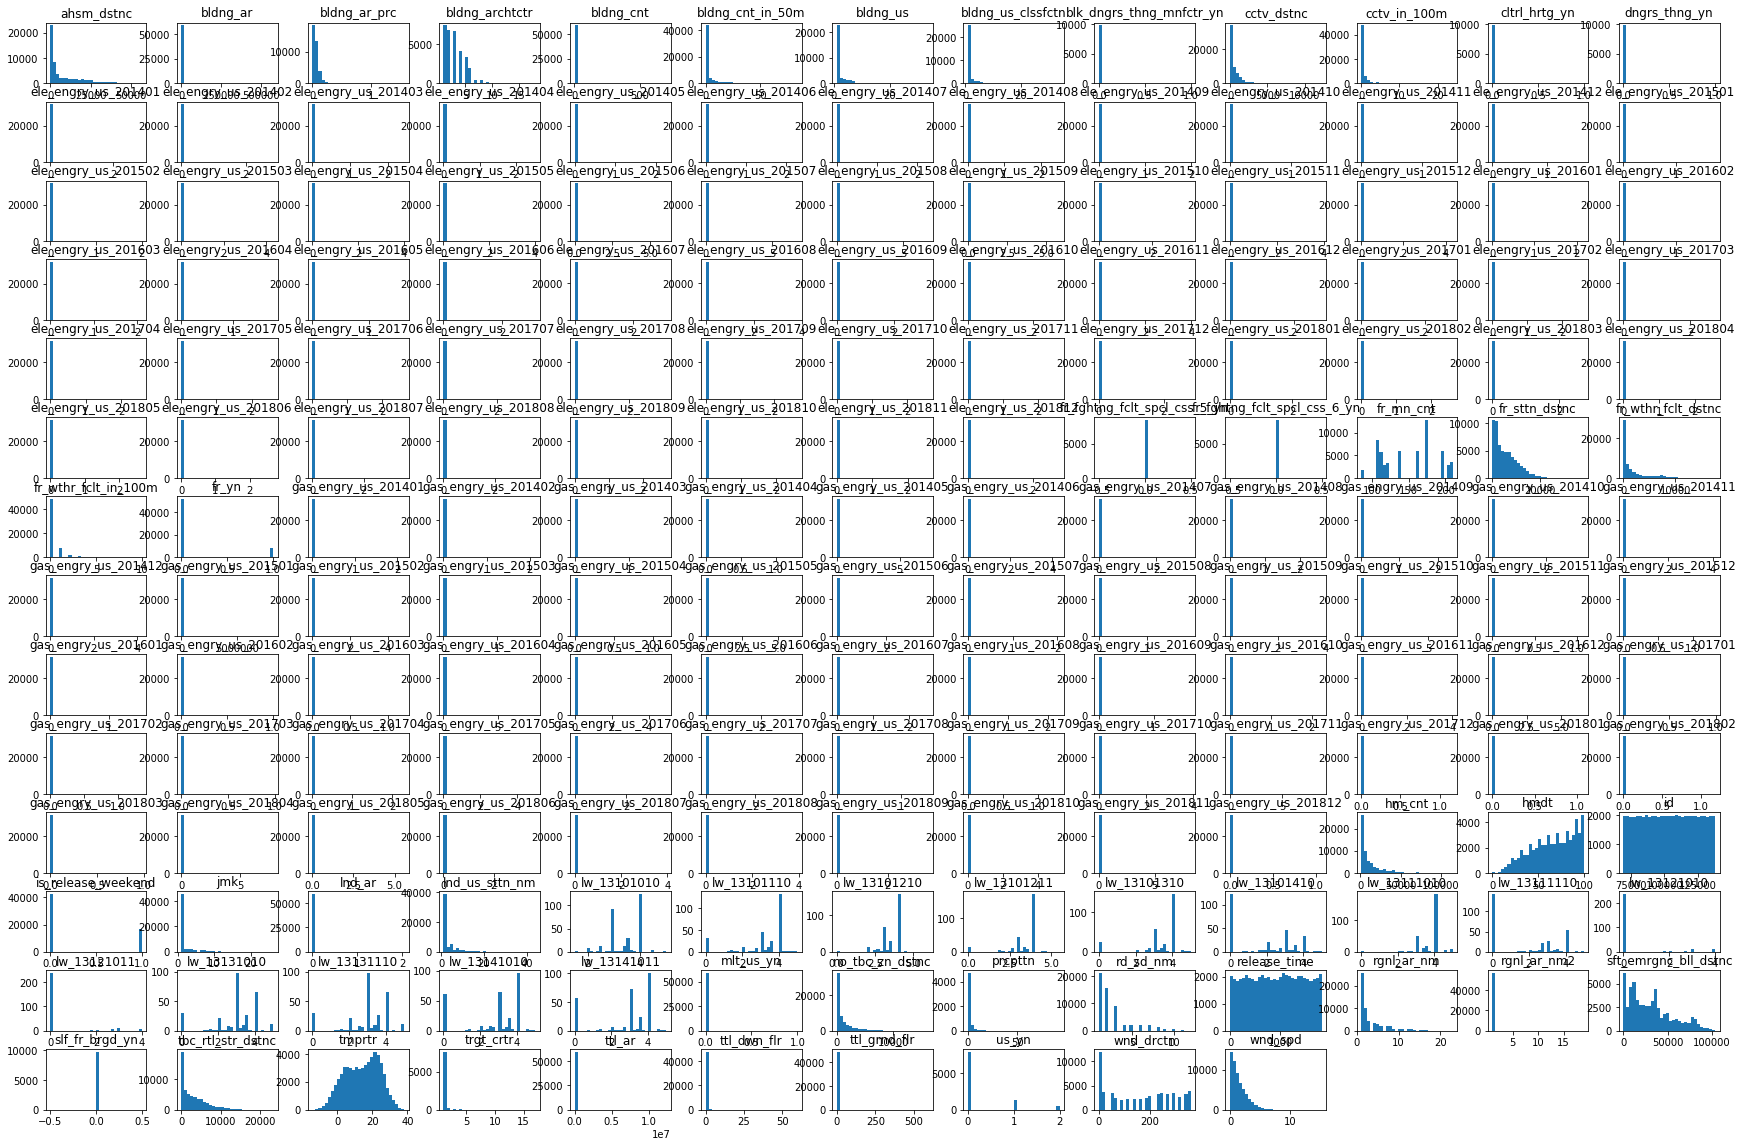

In [25]:
train.hist(bins=30,figsize=(30,20), grid=False);

### 날짜 데이터 만들기 

In [26]:
train['date']=pd.to_datetime(train['dt_of_fr'])
val['date']=pd.to_datetime(val['dt_of_fr'])
test['date']=pd.to_datetime(test['dt_of_fr'])
train['month']=train['date'].dt.strftime('%m')
train['hour']=train['date'].dt.strftime('%H')
train['year']=train['date'].dt.strftime('%y')
train.drop(['date'],axis=1,inplace=True)

val['month']=val['date'].dt.strftime('%m')
val['hour']=val['date'].dt.strftime('%H')
val['year']=val['date'].dt.strftime('%y')
val.drop(['date'],axis=1,inplace=True)

test['month']=test['date'].dt.strftime('%m')
test['hour']=test['date'].dt.strftime('%H')
test['year']=test['date'].dt.strftime('%y')
test.drop(['date'],axis=1,inplace=True)

train['hour']=train['hour'].astype(float)
train['month']=train['month'].astype(float)
train['year']=train['year'].astype(float)
val['hour']=val['hour'].astype(float)
val['month']=val['month'].astype(float)
val['year']=val['year'].astype(float)
test['hour']=test['hour'].astype(float)
test['month']=test['month'].astype(float)
test['year']=test['year'].astype(float)

### 건물 나이 (bldng_age)

In [27]:
#건물승인일자 -> 건물나이로 변경하기 위한 과정
train['dt_of_athrztn']=train['dt_of_athrztn'].astype(str)
val['dt_of_athrztn']=val['dt_of_athrztn'].astype(str)
test['dt_of_athrztn']=test['dt_of_athrztn'].astype(str)

train['dt_of_athrztn'] = train['dt_of_athrztn'].str[:4]
val['dt_of_athrztn'] = val['dt_of_athrztn'].str[:4]
test['dt_of_athrztn'] = test['dt_of_athrztn'].str[:4]

train['dt_of_athrztn']=train['dt_of_athrztn'].astype(float)
val['dt_of_athrztn']=val['dt_of_athrztn'].astype(float)
test['dt_of_athrztn']=test['dt_of_athrztn'].astype(float)

train['year']=train['year']+2000
val['year']=val['year']+2000
test['year']=test['year']+2000

In [28]:
train['bldng_age'] = train['year']-train['dt_of_athrztn']+1
val['bldng_age'] = val['year']-val['dt_of_athrztn']+1
test['bldng_age'] = test['year']-test['dt_of_athrztn']+1

### 시간,계절 데이터 생성

In [29]:
train.drop(['year', 'dt_of_athrztn'], axis='columns', inplace=True)
val.drop(['year', 'dt_of_athrztn'], axis='columns', inplace=True)
test.drop(['year', 'dt_of_athrztn'], axis='columns', inplace=True)

In [30]:
train['time']= 'zzz'
val['time']= 'zzz'
test['time']= 'zzz'

In [31]:
bins = [0,6,12,18,23,24]
bins_names = ['1','2','3','4','5']
train['time']=pd.cut(train['hour'],
                     bins,
                     labels=bins_names,
                     right=False,
                     include_lowest=True)

In [32]:
bins = [0,6,12,18,23,24]
bins_names = ['1','2','3','4','5']
val['time']=pd.cut(val['hour'],
                     bins,
                     labels=bins_names,
                     right=False,
                     include_lowest=True)

In [33]:
bins = [0,6,12,18,23,24]
bins_names = ['1','2','3','4','5']
test['time']=pd.cut(test['hour'],
                     bins,
                     labels=bins_names,
                     right=False,
                     include_lowest=True)

In [34]:
train['time']=train['time'].replace('5','1')
val['time']=val['time'].replace('5','1')
test['time']=test['time'].replace('5','1')

새벽 = 1
아침 = 2
점심 = 3
저녁 = 4

In [35]:
train['seasons']= 'zzz'
bins = [1,3,6,9,12,13]
bins_names = ['1','2','3','4','5']
train['seasons']=pd.cut(train['month'],bins,labels=bins_names,right=False,include_lowest=True)

val['seasons']= 'zzz'
bins = [1,3,6,9,12,13]
bins_names = ['1','2','3','4','5']
val['seasons']=pd.cut(val['month'],bins,labels=bins_names,right=False,include_lowest=True)

test['seasons']= 'zzz'
bins = [1,3,6,9,12,13]
bins_names = ['1','2','3','4','5']
test['seasons']=pd.cut(test['month'],bins,labels=bins_names,right=False,include_lowest=True)

In [36]:
train['seasons']=train['seasons'].replace('5','1')
val['seasons']=val['seasons'].replace('5','1')
test['seasons']=test['seasons'].replace('5','1')

겨울 = 1
봄 = 2
여름 = 3
가을 = 4

In [37]:
train.drop(['dt_of_fr'],axis=1,inplace=True)
train.drop(['hour'],axis=1,inplace=True)
train.drop(['month'],axis=1,inplace=True)
val.drop(['dt_of_fr'],axis=1,inplace=True)
val.drop(['hour'],axis=1,inplace=True)
val.drop(['month'],axis=1,inplace=True)
test.drop(['dt_of_fr'],axis=1,inplace=True)
test.drop(['hour'],axis=1,inplace=True)
test.drop(['month'],axis=1,inplace=True)

### 결측치 대체 

In [38]:
#범주형 최빈값으로 대체
imputer = Imputer(missing_values='NaN',strategy='most_frequent')
bin_features=['bldng_us',
'bldng_archtctr',
'bldng_us_clssfctn',
'wnd_drctn',
'hmdt',
'rgnl_ar_nm',
'rgnl_ar_nm2',
'lnd_us_sttn_nm',
'rd_sd_nm']
# train[bin_features]=train[bin_features].fillna(train[bin_features].mode())
train[bin_features] = imputer.fit_transform(train[bin_features].values)
val[bin_features] = imputer.fit_transform(val[bin_features].values)
test[bin_features] = imputer.fit_transform(test[bin_features].values)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
#연속형 평균으로 채우기
num_features = [
 'ttl_grnd_flr',
 'ahsm_dstnc',
 'tmprtr',
 'fr_wthr_fclt_in_100m',
 'ttl_dwn_flr',
 'wnd_spd',
 'hm_cnt',
 'bldng_ar',
 'bldng_ar_prc',
 'fr_mn_cnt',
 'ttl_ar',
 'bldng_cnt',
 'bldng_age']
train[num_features]=train[num_features].fillna(train[num_features].mean())
val[num_features]=val[num_features].fillna(val[num_features].mean())
test[num_features]=test[num_features].fillna(test[num_features].mean())

In [40]:
n_feature = ['prcpttn','gas_engry_us_201401',
 'ele_engry_us_201401',
 'gas_engry_us_201402',
 'ele_engry_us_201402',
 'gas_engry_us_201403',
 'ele_engry_us_201403',
 'gas_engry_us_201404',
 'ele_engry_us_201404',
 'gas_engry_us_201405',
 'ele_engry_us_201405',
 'gas_engry_us_201406',
 'ele_engry_us_201406',
 'gas_engry_us_201407',
 'ele_engry_us_201407',
 'gas_engry_us_201408',
 'ele_engry_us_201408',
 'gas_engry_us_201409',
 'ele_engry_us_201409',
 'gas_engry_us_201410',
 'ele_engry_us_201410',
 'gas_engry_us_201411',
 'ele_engry_us_201411',
 'gas_engry_us_201412',
 'ele_engry_us_201412',
 'gas_engry_us_201501',
 'ele_engry_us_201501',
 'gas_engry_us_201502',
 'ele_engry_us_201502',
 'gas_engry_us_201503',
 'ele_engry_us_201503',
 'gas_engry_us_201504',
 'ele_engry_us_201504',
 'gas_engry_us_201505',
 'ele_engry_us_201505',
 'gas_engry_us_201506',
 'ele_engry_us_201506',
 'gas_engry_us_201507',
 'ele_engry_us_201507',
 'gas_engry_us_201508',
 'ele_engry_us_201508',
 'gas_engry_us_201509',
 'ele_engry_us_201509',
 'gas_engry_us_201510',
 'ele_engry_us_201510',
 'gas_engry_us_201511',
 'ele_engry_us_201511',
 'gas_engry_us_201512',
 'ele_engry_us_201512',
 'gas_engry_us_201601',
 'ele_engry_us_201601',
 'gas_engry_us_201602',
 'ele_engry_us_201602',
 'gas_engry_us_201603',
 'ele_engry_us_201603',
 'gas_engry_us_201604',
 'ele_engry_us_201604',
 'gas_engry_us_201605',
 'ele_engry_us_201605',
 'gas_engry_us_201606',
 'ele_engry_us_201606',
 'gas_engry_us_201607',
 'ele_engry_us_201607',
 'gas_engry_us_201608',
 'ele_engry_us_201608',
 'gas_engry_us_201609',
 'ele_engry_us_201609',
 'gas_engry_us_201610',
 'ele_engry_us_201610',
 'gas_engry_us_201611',
 'ele_engry_us_201611',
 'gas_engry_us_201612',
 'ele_engry_us_201612',
 'gas_engry_us_201701',
 'ele_engry_us_201701',
 'gas_engry_us_201702',
 'ele_engry_us_201702',
 'gas_engry_us_201703',
 'ele_engry_us_201703',
 'gas_engry_us_201704',
 'ele_engry_us_201704',
 'gas_engry_us_201705',
 'ele_engry_us_201705',
 'gas_engry_us_201706',
 'ele_engry_us_201706',
 'gas_engry_us_201707',
 'ele_engry_us_201707',
 'gas_engry_us_201708',
 'ele_engry_us_201708',
 'gas_engry_us_201709',
 'ele_engry_us_201709',
 'gas_engry_us_201710',
 'ele_engry_us_201710',
 'gas_engry_us_201711',
 'ele_engry_us_201711',
 'gas_engry_us_201712',
 'ele_engry_us_201712',
 'gas_engry_us_201801',
 'ele_engry_us_201801',
 'gas_engry_us_201802',
 'ele_engry_us_201802',
 'gas_engry_us_201803',
 'ele_engry_us_201803',
 'gas_engry_us_201804',
 'ele_engry_us_201804',
 'gas_engry_us_201805',
 'ele_engry_us_201805',
 'gas_engry_us_201806',
 'ele_engry_us_201806',
 'gas_engry_us_201807',
 'ele_engry_us_201807',
 'gas_engry_us_201808',
 'ele_engry_us_201808',
 'gas_engry_us_201809',
 'ele_engry_us_201809',
 'gas_engry_us_201810',
 'ele_engry_us_201810',
 'gas_engry_us_201811',
 'ele_engry_us_201811',
 'gas_engry_us_201812',
 'ele_engry_us_201812',
 'lw_13101010',
 'lw_13101110',
 'lw_13101210',
 'lw_13101211',
 'lw_13101310',
 'lw_13101410',
 'lw_13111010',
 'lw_13111110',
 'lw_13121010',
 'lw_13121011',
 'lw_13131010',
 'lw_13131110',
 'lw_13141010',
 'lw_13141011',
 'emd_nm',
'trgt_crtr',
 'fr_fghtng_fclt_spcl_css_5_yn',
 'fr_fghtng_fclt_spcl_css_6_yn',
 'us_yn',
 'dngrs_thng_yn',
 'slf_fr_brgd_yn',
 'blk_dngrs_thng_mnfctr_yn',
 'cltrl_hrtg_yn']

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import random
import time
from tqdm import tqdm

In [42]:
n_feature = ['prcpttn','gas_engry_us_201401',
 'ele_engry_us_201401',
 'gas_engry_us_201402',
 'ele_engry_us_201402',
 'gas_engry_us_201403',
 'ele_engry_us_201403',
 'gas_engry_us_201404',
 'ele_engry_us_201404',
 'gas_engry_us_201405',
 'ele_engry_us_201405',
 'gas_engry_us_201406',
 'ele_engry_us_201406',
 'gas_engry_us_201407',
 'ele_engry_us_201407',
 'gas_engry_us_201408',
 'ele_engry_us_201408',
 'gas_engry_us_201409',
 'ele_engry_us_201409',
 'gas_engry_us_201410',
 'ele_engry_us_201410',
 'gas_engry_us_201411',
 'ele_engry_us_201411',
 'gas_engry_us_201412',
 'ele_engry_us_201412',
 'gas_engry_us_201501',
 'ele_engry_us_201501',
 'gas_engry_us_201502',
 'ele_engry_us_201502',
 'gas_engry_us_201503',
 'ele_engry_us_201503',
 'gas_engry_us_201504',
 'ele_engry_us_201504',
 'gas_engry_us_201505',
 'ele_engry_us_201505',
 'gas_engry_us_201506',
 'ele_engry_us_201506',
 'gas_engry_us_201507',
 'ele_engry_us_201507',
 'gas_engry_us_201508',
 'ele_engry_us_201508',
 'gas_engry_us_201509',
 'ele_engry_us_201509',
 'gas_engry_us_201510',
 'ele_engry_us_201510',
 'gas_engry_us_201511',
 'ele_engry_us_201511',
 'gas_engry_us_201512',
 'ele_engry_us_201512',
 'gas_engry_us_201601',
 'ele_engry_us_201601',
 'gas_engry_us_201602',
 'ele_engry_us_201602',
 'gas_engry_us_201603',
 'ele_engry_us_201603',
 'gas_engry_us_201604',
 'ele_engry_us_201604',
 'gas_engry_us_201605',
 'ele_engry_us_201605',
 'gas_engry_us_201606',
 'ele_engry_us_201606',
 'gas_engry_us_201607',
 'ele_engry_us_201607',
 'gas_engry_us_201608',
 'ele_engry_us_201608',
 'gas_engry_us_201609',
 'ele_engry_us_201609',
 'gas_engry_us_201610',
 'ele_engry_us_201610',
 'gas_engry_us_201611',
 'ele_engry_us_201611',
 'gas_engry_us_201612',
 'ele_engry_us_201612',
 'gas_engry_us_201701',
 'ele_engry_us_201701',
 'gas_engry_us_201702',
 'ele_engry_us_201702',
 'gas_engry_us_201703',
 'ele_engry_us_201703',
 'gas_engry_us_201704',
 'ele_engry_us_201704',
 'gas_engry_us_201705',
 'ele_engry_us_201705',
 'gas_engry_us_201706',
 'ele_engry_us_201706',
 'gas_engry_us_201707',
 'ele_engry_us_201707',
 'gas_engry_us_201708',
 'ele_engry_us_201708',
 'gas_engry_us_201709',
 'ele_engry_us_201709',
 'gas_engry_us_201710',
 'ele_engry_us_201710',
 'gas_engry_us_201711',
 'ele_engry_us_201711',
 'gas_engry_us_201712',
 'ele_engry_us_201712',
 'gas_engry_us_201801',
 'ele_engry_us_201801',
 'gas_engry_us_201802',
 'ele_engry_us_201802',
 'gas_engry_us_201803',
 'ele_engry_us_201803',
 'gas_engry_us_201804',
 'ele_engry_us_201804',
 'gas_engry_us_201805',
 'ele_engry_us_201805',
 'gas_engry_us_201806',
 'ele_engry_us_201806',
 'gas_engry_us_201807',
 'ele_engry_us_201807',
 'gas_engry_us_201808',
 'ele_engry_us_201808',
 'gas_engry_us_201809',
 'ele_engry_us_201809',
 'gas_engry_us_201810',
 'ele_engry_us_201810',
 'gas_engry_us_201811',
 'ele_engry_us_201811',
 'gas_engry_us_201812',
 'ele_engry_us_201812',
 'lw_13101010',
 'lw_13101110',
 'lw_13101210',
 'lw_13101211',
 'lw_13101310',
 'lw_13101410',
 'lw_13111010',
 'lw_13111110',
 'lw_13121010',
 'lw_13121011',
 'lw_13131010',
 'lw_13131110',
 'lw_13141010',
 'lw_13141011',
 'emd_nm',
'trgt_crtr',
 'fr_fghtng_fclt_spcl_css_5_yn',
 'fr_fghtng_fclt_spcl_css_6_yn',
 'us_yn',
 'dngrs_thng_yn',
 'slf_fr_brgd_yn',
 'blk_dngrs_thng_mnfctr_yn',
 'cltrl_hrtg_yn']

In [43]:
no_feature = [
'jmk',
'id',
'fr_wthr_fclt_dstnc',
'mlt_us_yn',
'cctv_dstnc',
'cctv_in_100m',
'tbc_rtl_str_dstnc',
'sft_emrgnc_bll_dstnc',
'no_tbc_zn_dstnc',
'bldng_cnt_in_50m',
'release_year',
'release_month',
'release_weekday',
'is_release_weekend',
'release_time',    
]

In [44]:
new_train1 = train[no_feature]
new_val1 = val[no_feature]
new_test1 = test[no_feature]


new_train2 = train[n_feature].fillna(-1)
#new_train2.isnull().sum()
new_val2 = val[n_feature].fillna(-1)
new_test2 = test[n_feature].fillna(-1)

f_train = pd.concat([train[bin_features],train[num_features],new_train2,new_train1],axis=1)
f_val = pd.concat([val[bin_features],val[num_features],new_val2,new_val1],axis=1)
f_test = pd.concat([test[bin_features],test[num_features],new_test2,new_test1],axis=1)

### 전체 변수

In [45]:
#f_train
y_train = train['fr_yn']
#f_val
y_val = val['fr_yn']
#f_test

In [46]:
df_all = pd.concat([f_train, f_val, f_test])
categorical_cols = df_all.select_dtypes(['object']).columns
categorical_cols
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes
X_train = df_all[:len(f_train)]
X_val = df_all[len(f_train):-len(f_test)]
test = df_all[-len(f_test):]

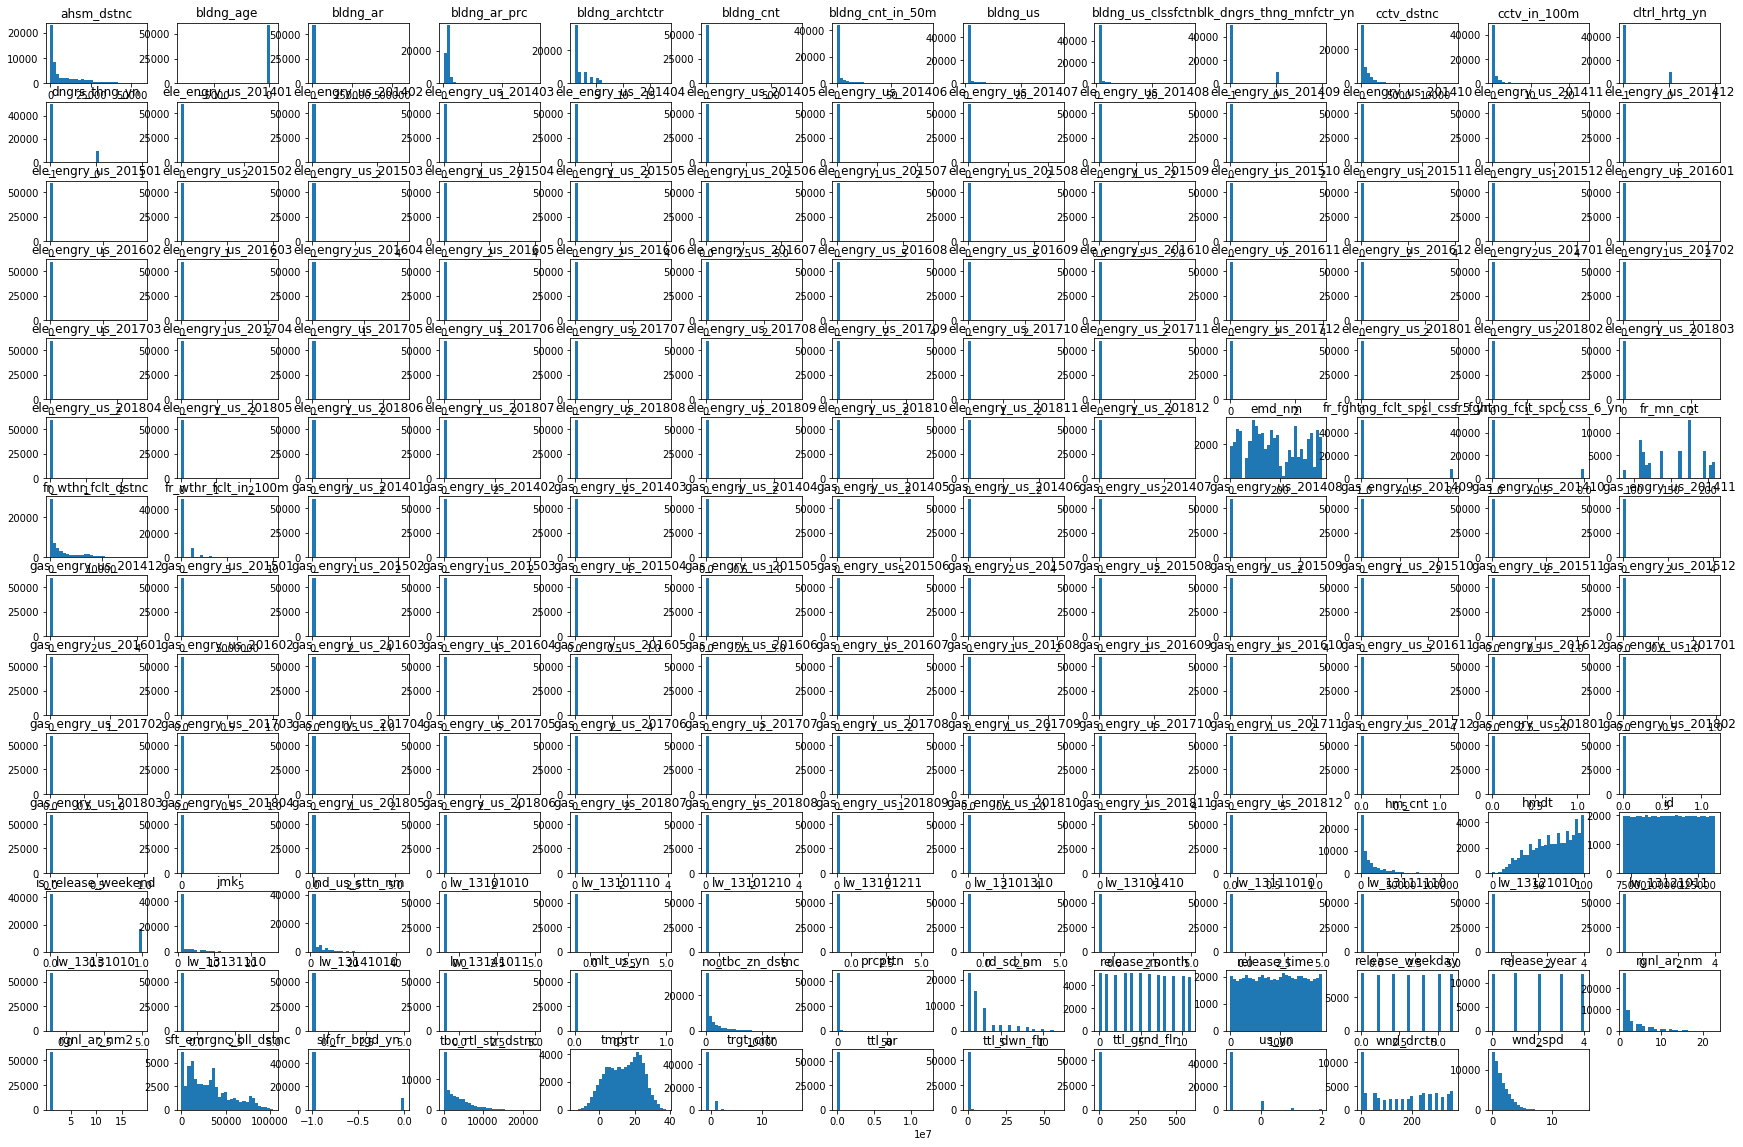

In [47]:
X_train.hist(bins=30,figsize=(30,20), grid=False);